<a href="https://colab.research.google.com/github/bcury/Python-Projects/blob/main/SeriesTemporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Series Temporais

**Pandas**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dict = {'a':3, 'b':4, 'c':5}

In [ ]:
pd.Series(dict)

a    3
b    4
c    5
dtype: int64

In [ ]:
oneD = pd.Series([100, 'cat', 310, 'gog', 500], ['amy', 'bobby', 'cat','don','emma'])

In [ ]:
oneD

amy      100
bobby    cat
cat      310
don      gog
emma     500
dtype: object

In [ ]:
oneD = pd.Series([100, 'cat', 310, 'gog', 500], index=['amy', 'bobby', 'cat','don','emma'])
oneD

amy      100
bobby    cat
cat      310
don      gog
emma     500
dtype: object

In [ ]:
oneD.loc[['cat','emma']]

cat     310
emma    500
dtype: object

In [ ]:
oneD.iloc[1]

'cat'

In [ ]:
df = pd.DataFrame(oneD)
df

,0
amy,100
bobby,cat
cat,310
don,gog
emma,500


**HTML**

In [ ]:
pip install html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import html

In [ ]:
br = pd.read_html('https://pt.wikipedia.org/wiki/Unidades_federativas_do_Brasil')

In [ ]:
type(br)

list

In [ ]:
u = br[0]
u

,0,1,2
0,Capítulo I,Da Organização Político-Administrativa,art. 18-19
1,Capítulo II,Da União,art. 20-24
2,Capítulo III,Dos Estados Federados,art. 25-28
3,Capítulo IV,Dos Municípios,art. 29-31
4,Capítulo V,Do Distrito Federal e dos Territórios,art. 32-33
5,Seção I,Do Distrito Federal,art. 32
6,Seção II,Dos Territórios,art. 33
7,Capítulo VI,Da Intervenção,art. 34-36
8,Capítulo VII,Da Administração Pública,art. 37-43
9,Seção I,Disposições Gerais,art. 37-38


**Pré Processamento e visualização**

#Data e Hora

In [ ]:
from datetime import datetime

In [ ]:
dt = datetime(year=2022, month=3,day=12)
dt

datetime.datetime(2022, 3, 12, 0, 0)

In [ ]:
type(dt)

datetime.datetime

ou

In [ ]:
from dateutil import parser

In [ ]:
date = parser.parse('12th of march, 2022')
date

datetime.datetime(2022, 3, 12, 0, 0)

ou

In [ ]:
date = np.array('2022-12-03',dtype=np.datetime64)
date

array('2022-12-03', dtype='datetime64[D]')

In [ ]:
series = pd.read_csv('/content/female_birth.csv', header=0,parse_dates=[0], squeeze=True, index_col=0)
series.head()

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Daily total female births in California, 1959, dtype: int64

In [ ]:
type(series)

pandas.core.series.Series

In [ ]:
series.size

366

In [ ]:
series.describe()

count     366.000000
mean       47.218579
std       100.472534
min        23.000000
25%        37.000000
50%        42.000000
75%        46.000000
max      1959.000000
Name: Daily total female births in California, 1959, dtype: float64

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
from matplotlib.pylab import rcParams

In [ ]:
rcParams['figure.figsize'] =15,6

In [ ]:
data = pd.read_csv('/content/AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


colocando o arquivo em serie temporal

In [ ]:
dataparse = lambda dates:pd.datetime.strptime(dates,'%Y-%m')

In [ ]:
data = pd.read_csv('/content/AirPassengers.csv',parse_dates=['Month'], index_col='Month',date_parser=dataparse)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [ ]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
data.dtypes

#Passengers    int64
dtype: object

In [ ]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [ ]:
from pandas.plotting import register_matplotlib_converters

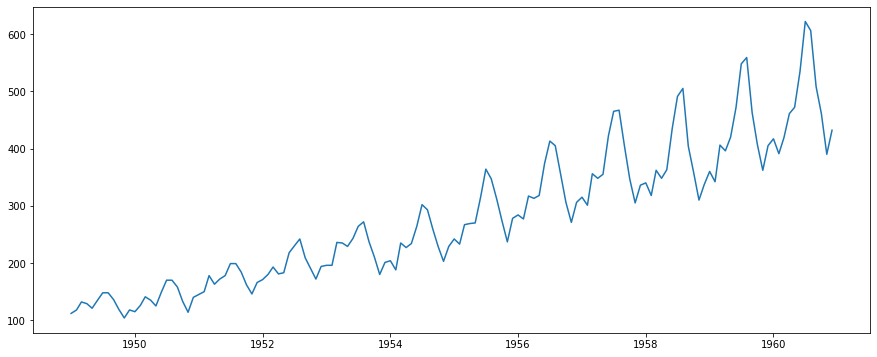

In [ ]:
register_matplotlib_converters()
plt.plot(data);

In [ ]:
df = pd.read_csv('/content/italy_earthquakes_from_2016-08-24_to_2016-11-30.csv').set_index('Time')

In [ ]:
df.head()

,Latitude,Longitude,Depth/Km,Magnitude
Time,,,,
2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6


In [ ]:
df.dtypes

Latitude     float64
Longitude    float64
Depth/Km     float64
Magnitude    float64
dtype: object

In [ ]:
df.index = pd.to_datetime(df.index) #essa collun Time agora esta coomo datetime

In [ ]:
df.head()

,Latitude,Longitude,Depth/Km,Magnitude
Time,,,,
2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6


In [ ]:
df.describe()

,Latitude,Longitude,Depth/Km,Magnitude
count,8086.000000,8086.000000,8086.000000,8086.000000
mean,42.829557,13.161034,9.968328,2.398368
std,0.125927,0.083058,2.194064,0.426381
min,41.581300,12.537700,0.200000,2.000000
25%,42.751350,13.103200,8.900000,2.100000
50%,42.821800,13.160700,9.900000,2.300000
75%,42.911000,13.215650,10.800000,2.600000
max,43.927300,13.852500,47.900000,6.500000


##gráfico de linhas

Text(0, 0.5, 'magnitude')

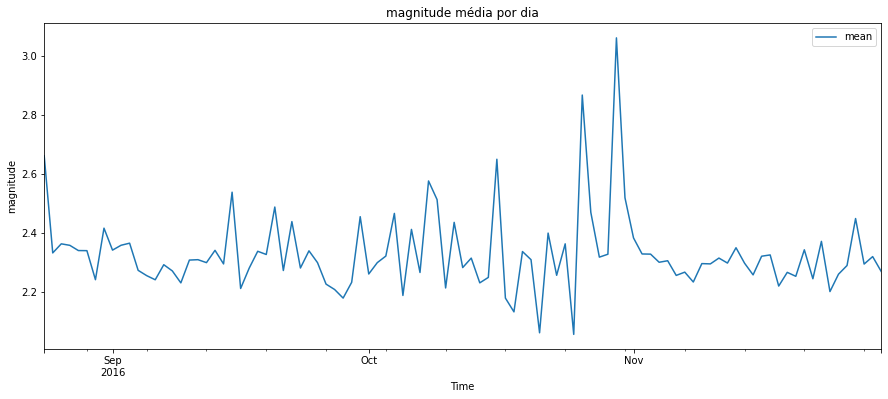

In [ ]:
df['Magnitude'].resample('D').apply([np.mean]).plot()
plt.title('magnitude média por dia')
plt.ylabel('magnitude')


Text(0, 0.5, 'magnitude')

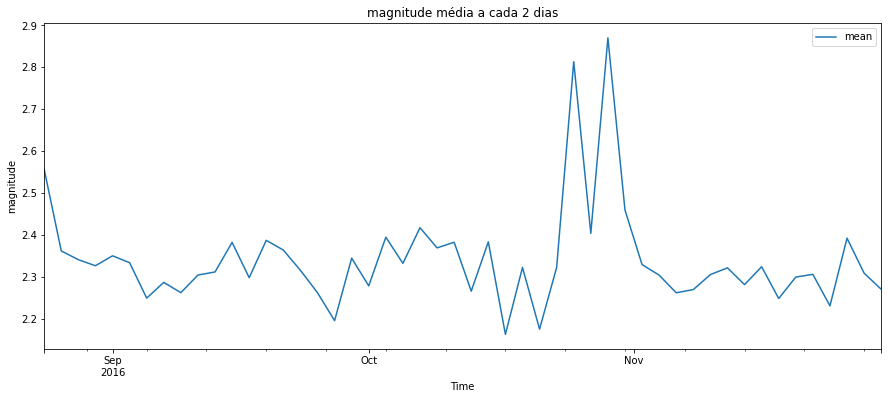

In [ ]:
df['Magnitude'].resample('2D').apply([np.mean]).plot()
plt.title('magnitude média a cada 2 dias')
plt.ylabel('magnitude')

In [ ]:
magn3 = df.loc[df['Magnitude'] >= 3.0,'Magnitude']

Text(0.5, 0, 'tempo')

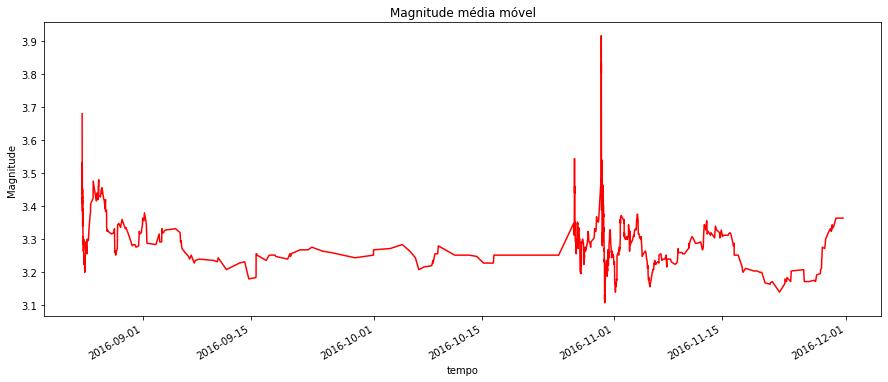

In [ ]:
pd.Series.rolling(magn3, window=25).mean().plot(style='r')
plt.title('Magnitude média móvel')
plt.ylabel('Magnitude')
plt.xlabel('tempo')

quanto mais se aplica a média móvel, mas temos suavuzação, mais linear fica o gráfico

In [ ]:
Data = pd.read_csv('/content/avocado.csv', parse_dates=['Date'])
Data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
summr = Data.groupby('Date')['Total Volume'].mean().reset_index()

In [ ]:
summr.head()

,Date,Total Volume
0,2015-01-04,7.840216e+05
1,2015-01-11,7.273686e+05
2,2015-01-18,7.258221e+05
3,2015-01-25,7.080211e+05
4,2015-02-01,1.106048e+06


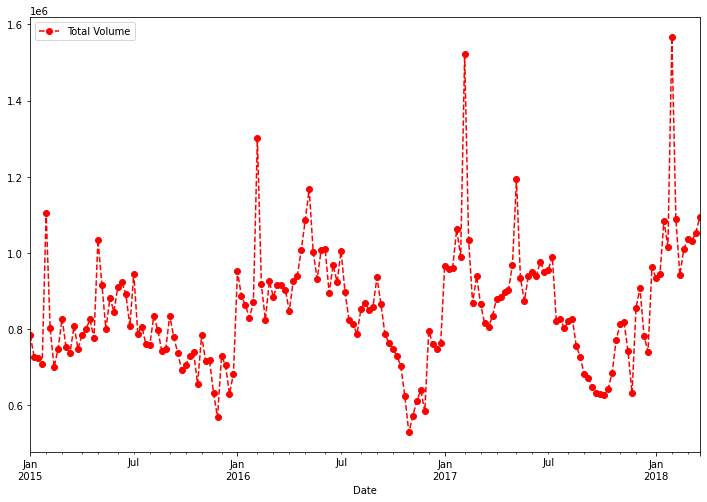

In [ ]:

fig, ax = plt.subplots(1,1, figsize=(12,8))
summr.set_index('Date').plot(ax=ax, marker='o', linestyle='--', color='red');

Text(0.5, 0, 'Mês')

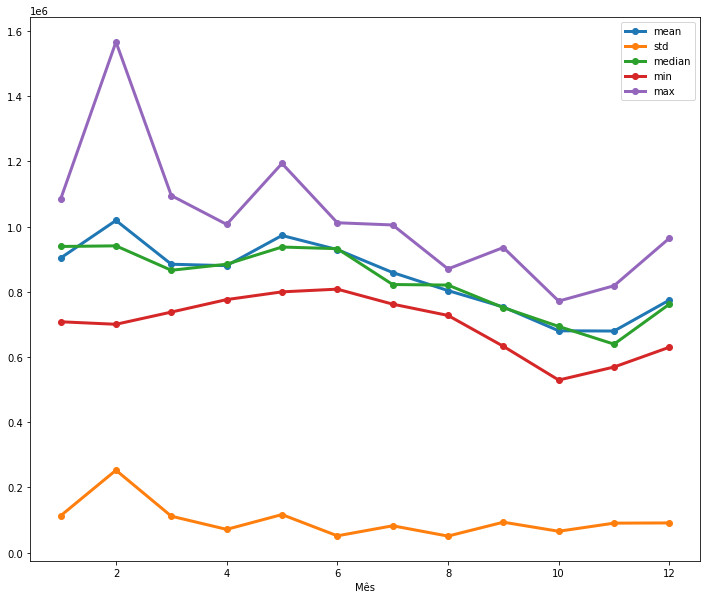

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12,10))
(summr.set_index('Date').assign(month=lambda df: df.index.month).groupby('month')['Total Volume'].agg(['mean','std','median','min','max']).plot(ax=ax, marker='o',linewidth=3,))
ax.set_xlabel('Mês')

In [ ]:
base = pd.read_csv('/content/all-stocks-2006-01-01-to-2018-01-01.csv', parse_dates=['Date'])
base.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM


In [ ]:
rng = pd.date_range(start='2006-01-01', end='2018-01-01', freq='B')
rng[~rng.isin(base.Date.unique())]

DatetimeIndex(['2006-01-02', '2006-01-16', '2006-02-20', '2006-04-14',
               '2006-05-29', '2006-07-04', '2006-09-04', '2006-11-23',
               '2006-12-25', '2007-01-01',
               ...
               '2017-01-02', '2017-01-16', '2017-02-20', '2017-04-14',
               '2017-05-29', '2017-07-04', '2017-09-04', '2017-11-23',
               '2017-12-25', '2018-01-01'],
              dtype='datetime64[ns]', length=111, freq=None)

In [ ]:
sample_dates = pd.date_range(start='2006-01-01', end='2018-01-01', freq='B')

In [ ]:
year_end_dates = sample_dates[sample_dates.is_year_end]
year_end_dates

DatetimeIndex(['2006-12-29', '2007-12-31', '2008-12-31', '2009-12-31',
               '2010-12-31', '2011-12-30', '2012-12-31', '2013-12-31',
               '2014-12-31', '2015-12-31', '2016-12-30', '2017-12-29'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
worst_stocks = base[base.Date == base.Date.max()].sort_values('Open').head()
worst_stocks

,Date,Open,High,Low,Close,Volume,Name
33217,2017-12-29,17.27,17.53,17.27,17.45,76149513,GE
66434,2017-12-29,36.23,36.49,36.22,36.22,11421487,PFE
21137,2017-12-29,38.41,38.62,38.30,38.30,12583621,CSCO
24157,2017-12-29,45.70,46.18,45.69,45.88,8371536,KO
45296,2017-12-29,46.21,46.49,46.09,46.16,17394491,INTC


In [ ]:
worst_stocks.Name.values

array(['GE', 'PFE', 'CSCO', 'KO', 'INTC'], dtype=object)

#Previsoes com médias moveis

In [ ]:
dataparse = lambda dates:pd.datetime.strptime(dates,'%Y-%m')
data = pd.read_csv('/content/AirPassengers.csv',parse_dates=['Month'], index_col='Month',date_parser=dataparse)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [71]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

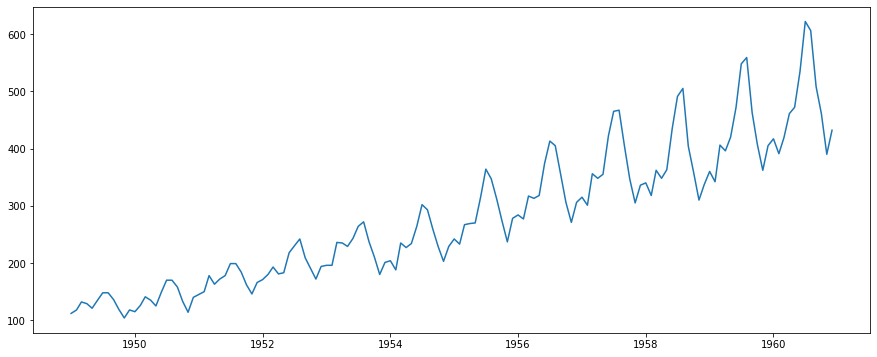

In [72]:
plt.plot(data)

In [85]:
optimal_n = None
best_mse = None

db = data[['#Passengers']].values.astype('float32')
mean_results_for_all_possible_n_value = np.zeros(int(len(db) / 2 - 2))

for n in range(3, int(len(db)/ 2  + 1)):
  mean_for_n = np.zeros(len(db) -n)
  for i in range(0, len(db) -  n):
    mean_for_n[i] = np.power(np.mean(db[:,0][i:i+n]) - db[i + n][0],2)
  mean_results_for_all_possible_n_value[n - 3] = np.mean(mean_for_n)

optimal_n = np.argmin(mean_results_for_all_possible_n_value) + 3
best_mse =  np.min(mean_results_for_all_possible_n_value)

print('MSE',mean_results_for_all_possible_n_value)
print('Melhor MSE',best_mse)
print('otimo n=', optimal_n)

MSE [ 2339.63356126  2764.88660714  3012.10128709  3151.45469085
  3227.18632274  3256.56100643  3186.6614532   3011.60186946
  2743.00652782  2472.34091928  2354.71361401  2403.15665424
  2555.64628844  2755.90582275  2957.73325883  3148.95678109
  3318.74202065  3471.20655414  3579.85735927  3632.1383133
  3621.28446048  3590.00382793  3614.46072399  3714.23057056
  3856.30383806  4039.07639445  4228.22951927  4417.98332931
  4590.62775569  4759.11651611  4915.97544876  5048.63704665
  5147.82094512  5226.01903743  5334.33177783  5486.37155691
  5665.83581156  5879.92290769  6108.05805477  6311.94563847
  6507.04778972  6685.18398409  6897.90877682  7105.06745207
  7299.11089319  7470.66004841  7664.68188379  7894.86749032
  8104.34268864  8337.10501668  8595.05628641  8844.55092457
  9063.90415815  9272.33339998  9544.40100932  9837.04023888
 10135.60331142 10420.20548681 10725.07181564 11069.94461765
 11393.32528446 11748.71711731 12111.18046458 12433.46474122
 12664.11747454 12932

In [90]:
np.mean(db[:,0][len(db)- optimal_n:len(db)]) #média móvel

427.66666

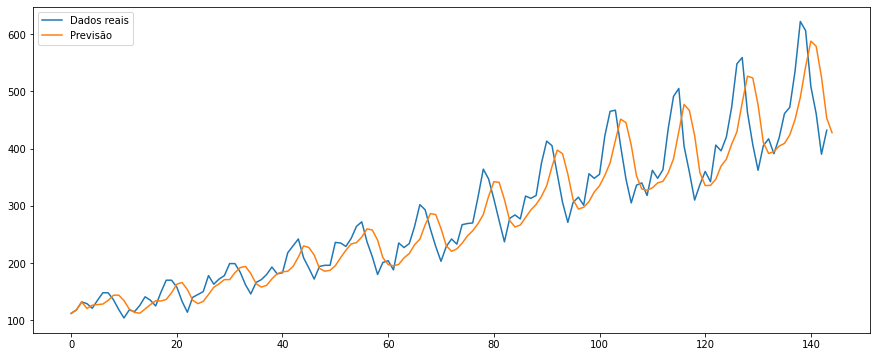

In [95]:
forecast = np.zeros(len(db)+ 1)
for i in range(0, optimal_n):
  forecast[i] = db[i][0]
for i in range(0, len(db) - optimal_n + 1):
  forecast[i + optimal_n] = np.mean(db[:,0][i:i+ optimal_n])

plt.plot(db[:,0], label='Dados reais')
plt.plot(forecast, label='Previsão') #usando media movel
plt.legend()
plt.show();
 

- Decomposição Serie Temporal

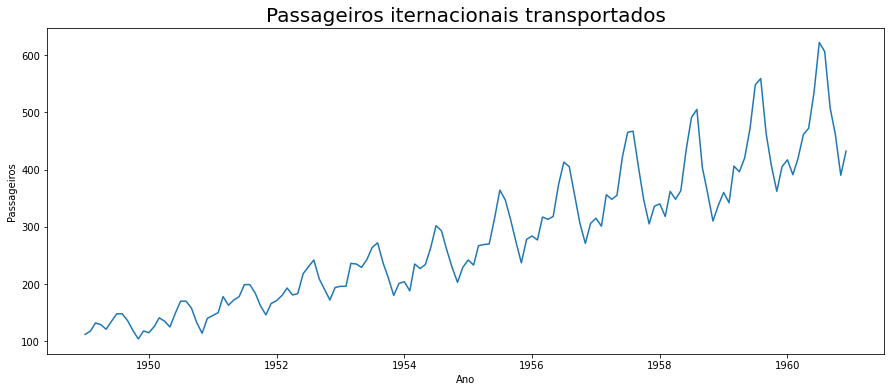

In [100]:
plt.plot(data)
plt.title('Passageiros iternacionais transportados', fontsize=20)
plt.ylabel('Passageiros')
plt.xlabel('Ano')
plt.show();

In [101]:
from statsmodels.tsa.seasonal import seasonal_decompose

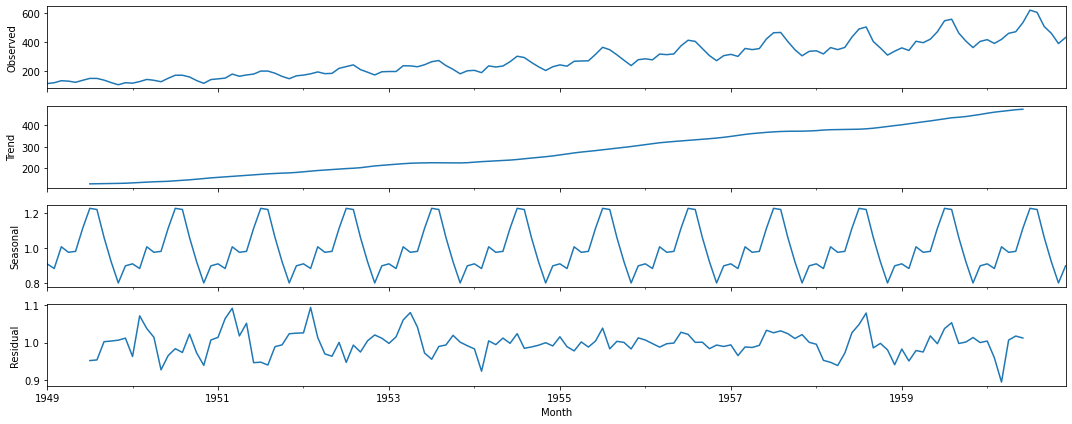

In [105]:
decomposição = seasonal_decompose(data, model='multiplicative')
decomposição.plot()
plt.show();

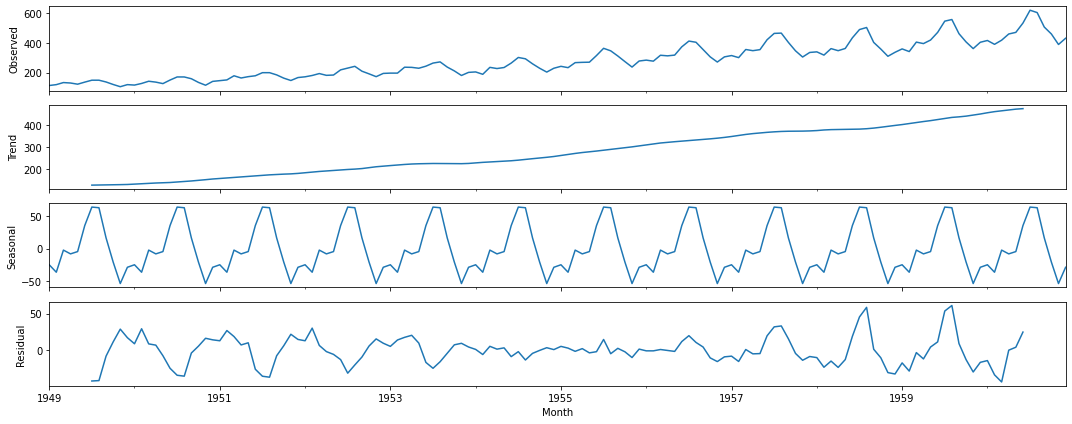

In [106]:
decomposição2 = seasonal_decompose(data, model='adtive')
decomposição2.plot()
plt.show();

#Teste de Estacionariedade

In [107]:
from statsmodels.tsa.stattools import adfuller

In [108]:
x = data['#Passengers']
result = adfuller(x)

In [110]:
print('ADF', result[0] )

ADF 0.8153688792060472


In [112]:
print('valor de p', result[1])

valor de p 0.991880243437641


In [114]:
print('valores criticos', result[4] ) #teste de hipotese

valores criticos {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


In [117]:
#transformar serie em estacionaria #LOG

In [118]:
d_log =  np.log(data)

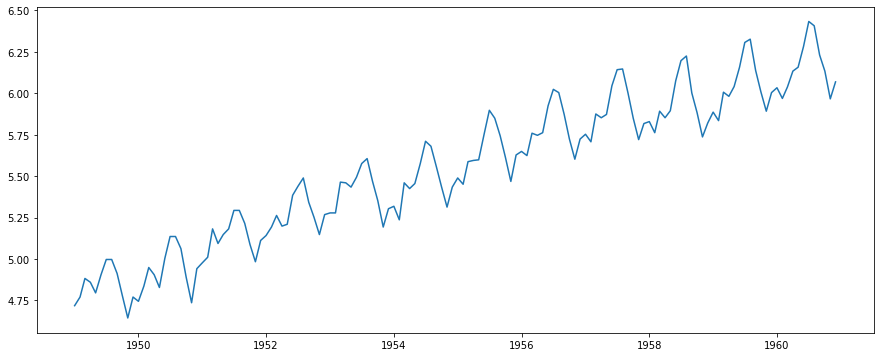

In [122]:
plt.plot(d_log);

In [123]:
#outras tecnicas: DIFERENCIAÇÃO , DIFERENCIAÇÃO COM LOG

#REMOÇÃO DA TEDENCIA DA  SERIE TEMPORAL COM REGRESSÃO

In [128]:
x = [i for i in range(0, len(data))]
x = np.reshape(x,(len(x),1))
y  = data.values

In [129]:
from sklearn.linear_model import LinearRegression

In [131]:
modelo = LinearRegression()
modelo.fit(x,y)

LinearRegression()

In [134]:
trend = modelo.predict(x) #previsao de ML

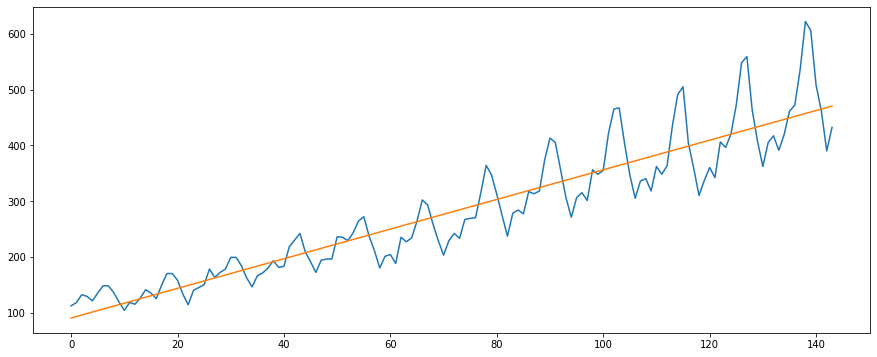

In [138]:
plt.plot(y)
plt.plot(trend)
plt.show(); #Linha laranja é a regressão

In [139]:
sem_trend = [y[i] - trend[i] for i in range(0, len(data))]

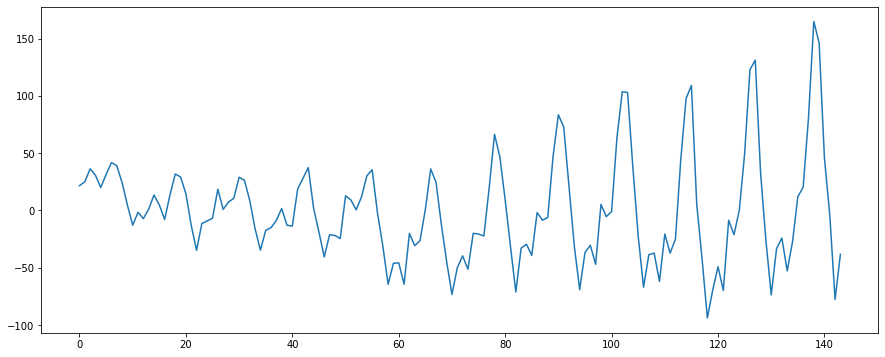

In [142]:
plt.plot(sem_trend)
plt.show(); #serie temp sem a tendencia